
# LOAN APPLICATION STATUS PREDICTION PROJECT 


## IMPORTING NECESSARY LIBRARIES-

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

import warnings 
warnings.filterwarnings('ignore')

## LOAD THE DATASET -

In [2]:
loan = pd.read_csv("C:\\Users\\diwak\\Downloads\\loan_prediction.csv")
pd.set_option('display.max_columns',None)
loan.head(10)         # head()method will show the top 5 rows and columns 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### The Loan application dataset includes details like loan_ID,Gender,Married,Dependents,Education,credit history, loan amount, their income,Loan status and so on. 

## DATA EXPLORATION -

In [3]:
# Checking the shape of the dataset-

loan.shape

(614, 13)

#### - Here as we can see that we have 614 rows and 13 attributes in our dataset.

In [4]:
# checking the names of all the columns 

loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### - This is the list of 13 columns names present in our dataset.

In [5]:
# checking the datatypes of all the columns 

loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### - We have object, float and integer type of data in the dataset.Our target variable is object datatype .

In [6]:
# Checking the nunique values in each columns-

loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### - These are the features which is present including the target variable 'Loan_status' which has 2 uniques numbers of values .

In [7]:
loan.select_dtypes(include='object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

#### These are all the object datatype columns including target variable.

In [8]:
# checking the value count of each columns -

for i in loan.columns:
    print('-' * 50 + i + '-' * 50 , end=' - ')
    display(loan[i].value_counts().head())

--------------------------------------------------Loan_ID-------------------------------------------------- - 

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
Name: Loan_ID, dtype: int64

--------------------------------------------------Gender-------------------------------------------------- - 

Male      489
Female    112
Name: Gender, dtype: int64

--------------------------------------------------Married-------------------------------------------------- - 

Yes    398
No     213
Name: Married, dtype: int64

--------------------------------------------------Dependents-------------------------------------------------- - 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

--------------------------------------------------Education-------------------------------------------------- - 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

--------------------------------------------------Self_Employed-------------------------------------------------- - 

No     500
Yes     82
Name: Self_Employed, dtype: int64

--------------------------------------------------ApplicantIncome-------------------------------------------------- - 

2500    9
4583    6
6000    6
2600    6
3333    5
Name: ApplicantIncome, dtype: int64

--------------------------------------------------CoapplicantIncome-------------------------------------------------- - 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
Name: CoapplicantIncome, dtype: int64

--------------------------------------------------LoanAmount-------------------------------------------------- - 

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
Name: LoanAmount, dtype: int64

--------------------------------------------------Loan_Amount_Term-------------------------------------------------- - 

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
Name: Loan_Amount_Term, dtype: int64

--------------------------------------------------Credit_History-------------------------------------------------- - 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

--------------------------------------------------Property_Area-------------------------------------------------- - 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

--------------------------------------------------Loan_Status-------------------------------------------------- - 

Y    422
N    192
Name: Loan_Status, dtype: int64

#### These are the value count of each columns present in our dataset. As observed , our target variable has imbalanced data as most of the people has applied for loan .

In [9]:
# Checking the info of the features in the dataset-
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### KEY OBSERVATIONS -

- There are 614 non null values in columns ['Loan_ID','Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_status']in our dataset , while the rest of 7 columns has multiple null values [Gender,Married,Dependents,Self employed,Loan amount,Credit History,loan amount_Term] .

- Since the column 'Loan_ID' is only for identification purpose and don't have much impact on model building, we can drop this column from the dataset.

## DROPPING UNNECESSARY COLUMNS-

In [10]:
# Drop loan_ID because it is irrelevant.

loan.drop(columns='Loan_ID', inplace= True)

In [11]:
#Mapping dictionary for replacing values -

mapping={1:'Yes',0:'No'}

# Replacing values in the 'Credit_History'column

loan['Credit_History']=loan['Credit_History'].map(mapping)
loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y


## CHECKING FOR MISSING VALUES IN THE COLUMNS 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


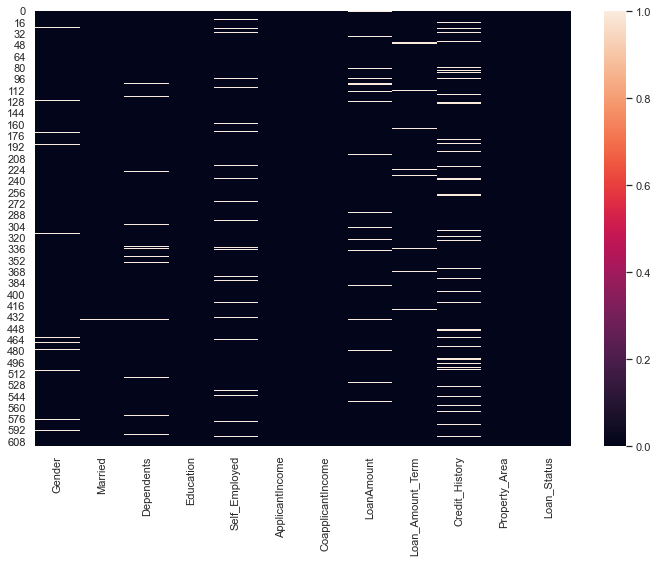

In [12]:
#Checking for Missing Values

plt.figure(figsize=[12,8])
sns.heatmap(loan.isnull())
print(loan.isnull().sum())

#### - These are the null values present in 7 columns ['Gender','Married','Dependents','Self employed','Loan amount','Credit History','loan amount_Term']  so we need to replace them first.

### REPLACING THE NULL VALUES -

In [13]:
#Imputing the mode value of a column for categorical data- 

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace = True)

In [14]:
#imputing the mean value of a column for continuous data-

loan['LoanAmount'].fillna(np.mean(loan['LoanAmount']),inplace = True)
loan['Loan_Amount_Term'].fillna(np.mean(loan['Loan_Amount_Term']),inplace = True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


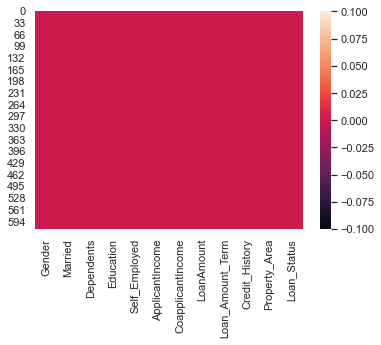

In [15]:
sns.heatmap(loan.isnull())
print(loan.isnull().sum())

#### - Now the data looks clean without any significant null values .

## DATA VISUALIZATION

## UNIVARIATE ANALYSIS USING COUNTPLOT-

### VISUALIZING VALUE COUNT FOR EACH CATEGORICAL COLUMNS 

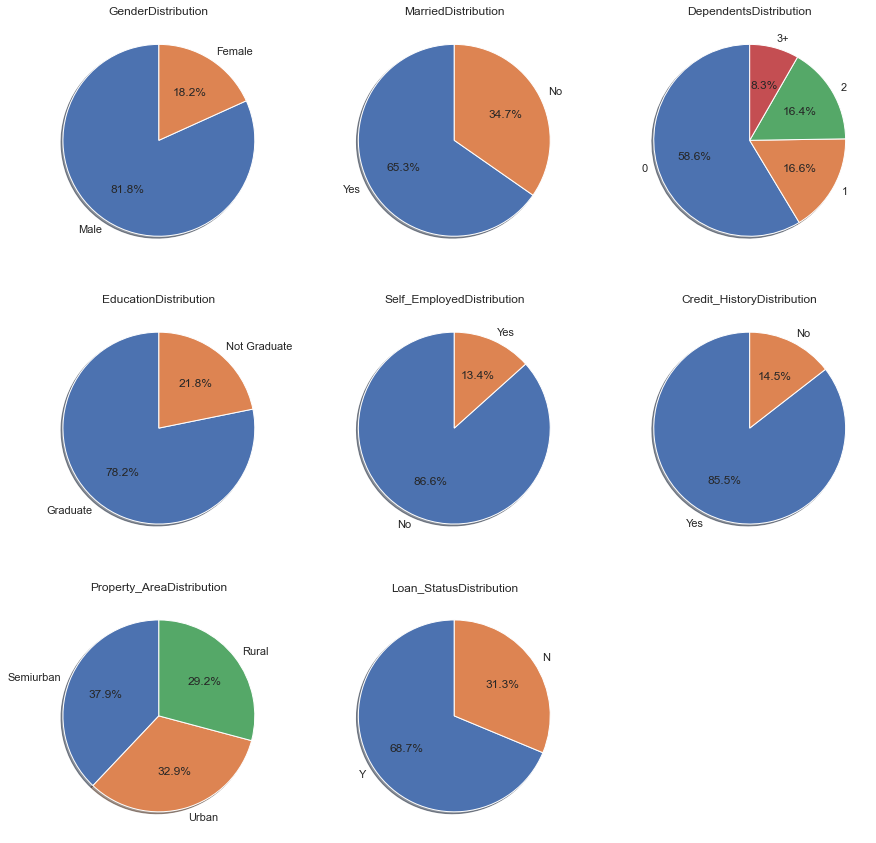

In [16]:
cat_var=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

# Create figure with subplots 
fig,axs=plt.subplots(nrows=3,ncols=3, figsize=(15,15))

#create a pie chart
for i,var in enumerate(cat_var):
    if i < len(axs.flat):
        cat=loan[var].value_counts()
        axs.flat[i].pie(cat,labels=cat.index, autopct='%1.1f%%',startangle=90,shadow=True)
        axs.flat[i].set_title(f'{var}Distribution')

axs[2,2].remove()
plt.show()

### KEY OBSERVATIONS -

- There are 7 categorical columns.In Gender , majority of males(81.8 %) predominates Females(18.2 %) where most of them were married(65.3%) than unmarried(34.7%).
- Dependents where divided into 4 categories where 0 dependencywas having maximum counts(58.6%)while the least with more than 3+ dependencies.
- In education distribution, majority of graduates(78.2%) overpowered the non graduates (21.8%).
- Around 13.4% applicants are self employed while others are not.
- From all the types of property areas, almost equal number of applicants are there. But most number of applicants are having property area in semi urban areacompared to urban and rural areas.
- most of loan applicant belong from semiurban area. 7- Our Target attribute is almost balance as it has 55:45 ratio.

## BI-VARIATE ANALYSIS 

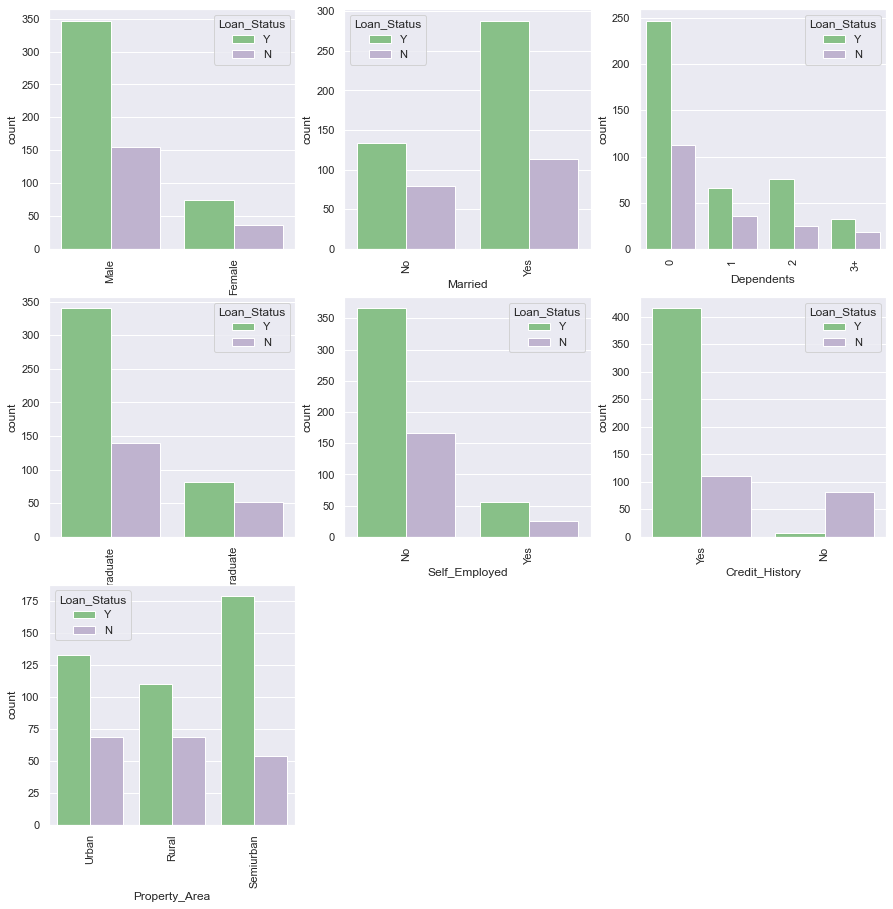

In [17]:
# List of categorical variable to plot

cat_var=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

# Create figure with subplots 
fig,axs=plt.subplots(nrows=3,ncols=3, figsize=(15,15))
axs=axs.flatten()

#Create barplot for each categorical variable 

for i , var in enumerate(cat_var):
    sns.countplot(x=var , hue='Loan_Status' ,data= loan , ax=axs[i],palette='Accent')
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90)
    
# remove the 7th and 8th subplots
fig.delaxes(axs[7])
fig.delaxes(axs[8])
plt.show()

### VISUALIZING NUMERICAL DATA -

In [18]:
#for Numeric columns

num_loan = loan.select_dtypes(exclude='object')
num_loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,146.412162,360.0
1,4583,1508.0,128.000000,360.0
2,3000,0.0,66.000000,360.0
3,2583,2358.0,120.000000,360.0
4,6000,0.0,141.000000,360.0
...,...,...,...,...
609,2900,0.0,71.000000,360.0
610,4106,0.0,40.000000,180.0
611,8072,240.0,253.000000,360.0
612,7583,0.0,187.000000,360.0


In [19]:
# let do bivariate analysis of numerical data-

def numplot(loan,col):
    plt.figure(figsize=(10,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='bright' ,data = loan)
    plt.plot()

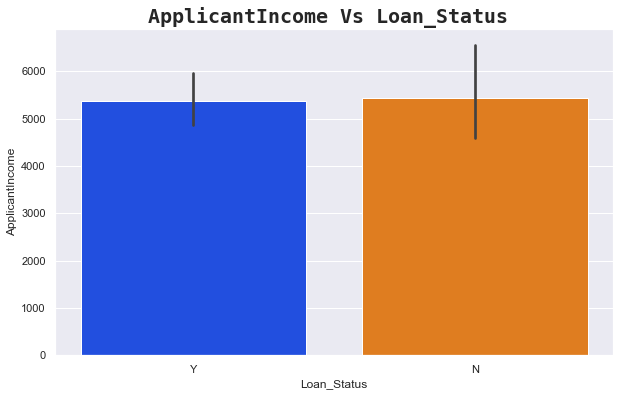

In [20]:
numplot(loan,'ApplicantIncome')

#### This looks almost same which means that those number of peoplewith same income has their sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

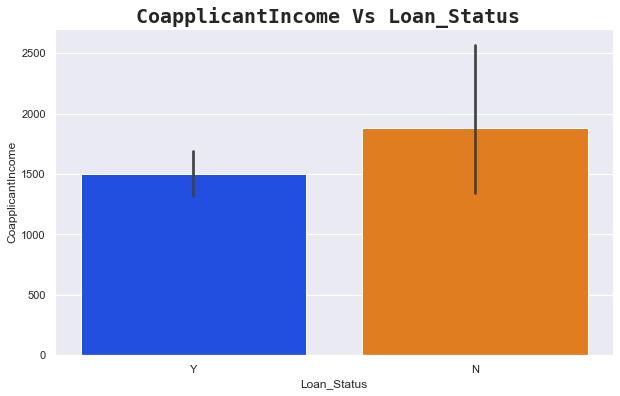

In [21]:
numplot(loan,'CoapplicantIncome')

#### As observed that if co-applicant income is higher than 1500, there are chances of denial to loan.

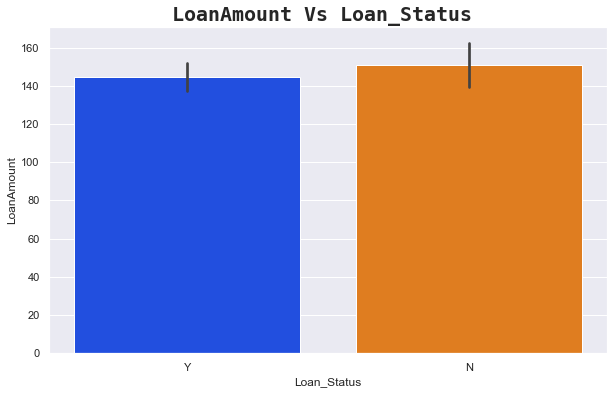

In [22]:
numplot(loan,'LoanAmount')

####  This looks almost identical regarding Loan Amount. There is no relation between Loan Amount and Loan Status.

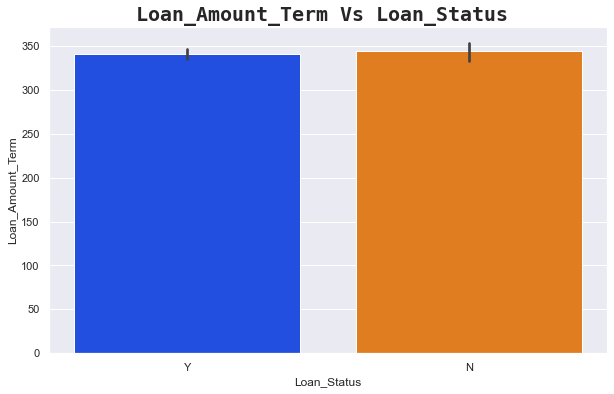

In [23]:
numplot(loan,'Loan_Amount_Term')

#### Here also we see a similar trend between Loan amount term and loan status which means their is no relationship between them.

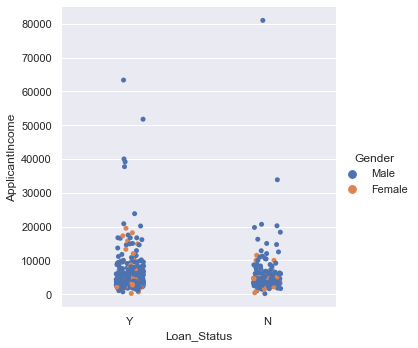

In [24]:

sns.catplot('Loan_Status','ApplicantIncome',data = loan,hue = 'Gender')

#### On the basis of applicant income , loan status was seen majorily among males than females .

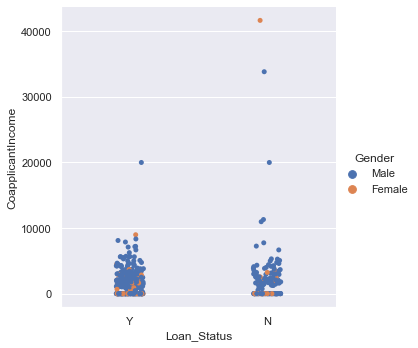

In [25]:
sns.catplot('Loan_Status','CoapplicantIncome',data = loan,hue = 'Gender')

#### On the basis of Coapplicant income , loan status was seen again majorily among males than females groups .

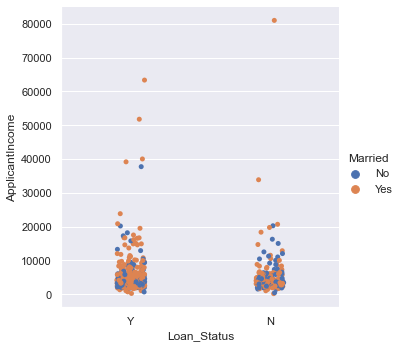

In [26]:
sns.catplot('Loan_Status','ApplicantIncome',data = loan,hue = 'Married')

#### On the basis of applicant income , loan status was seen majorily among married people than unmarried .

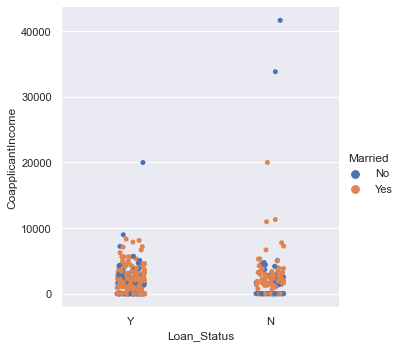

In [27]:
sns.catplot('Loan_Status','CoapplicantIncome',data = loan,hue = 'Married')

#### On the basis of Coapplicant income , loan status was seen majorily among married than unmarried .

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

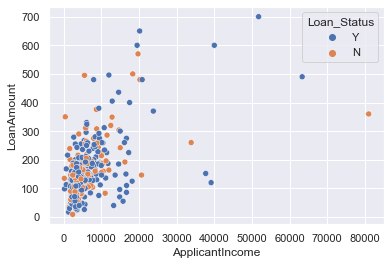

In [28]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=loan)

#### As the applicant income increases, the loan amount also increases with equal possibility of loan provided .

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

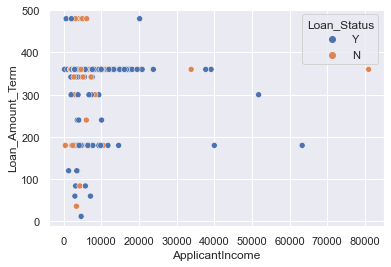

In [29]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Amount_Term',hue='Loan_Status',data=loan)

## STATISTICAL SUMMARY-

In [30]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


## KEY OBSERVATIONS -
- The total count present in each attributes is 614 , which means there is no null values presnet in our dataset.
- The mean is greater than median in most of the columns such as 'Gender','Married','Dependent','Applicant income','Coapplicantincome'and'LoanAmount', which is indicative of that the data is right skewed .
- The difference between 75th percentile and max value is much higher in 'Applicant income','Coapplicantincome','LoanAmount','Loan_Amount_Term' and 'Dependents', which is suggestive of outliers .

## ENCODING THE CATEGORICAL DATA -

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  

In [32]:
# loop over all the columns where dtypes is object then print the columns name and there unique values -

for col in loan.select_dtypes(include=['object']).columns:
    print(f"{col}:{loan[col].unique()}")

Gender:['Male' 'Female']
Married:['No' 'Yes']
Dependents:['0' '1' '2' '3+']
Education:['Graduate' 'Not Graduate']
Self_Employed:['No' 'Yes']
Credit_History:['Yes' 'No']
Property_Area:['Urban' 'Rural' 'Semiurban']
Loan_Status:['Y' 'N']


In [33]:
for i in loan.columns:
    if loan[i].dtypes == "object":
        loan[i] = le.fit_transform(loan[i].values.reshape(-1,1))
     

In [34]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


#### - Finally , we have encoded the categorical data .

## CORRELATION MATRIX

<AxesSubplot:>

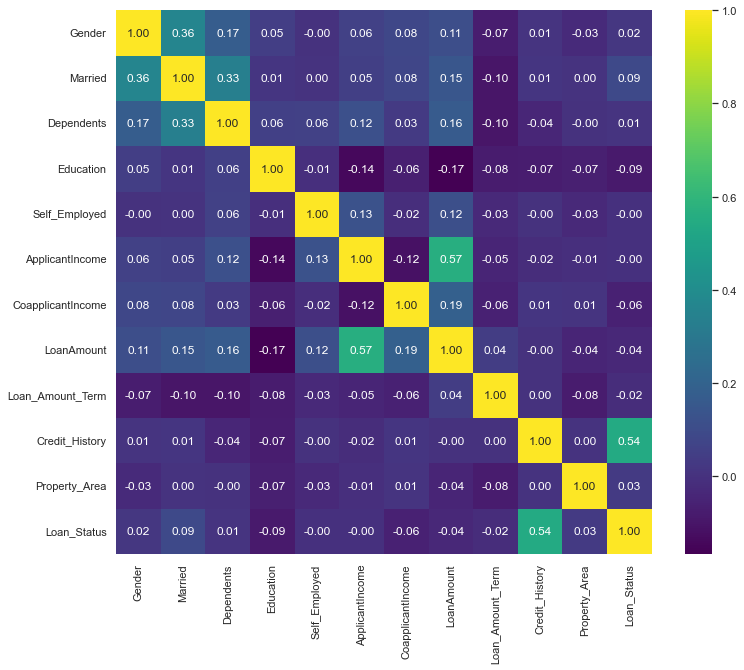

In [35]:
#Plotting the correlation of columns
Correlation=loan.corr()

plt.figure(figsize=[12,10])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='viridis')

## Correlation with Target Column(Loan_Status)

Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


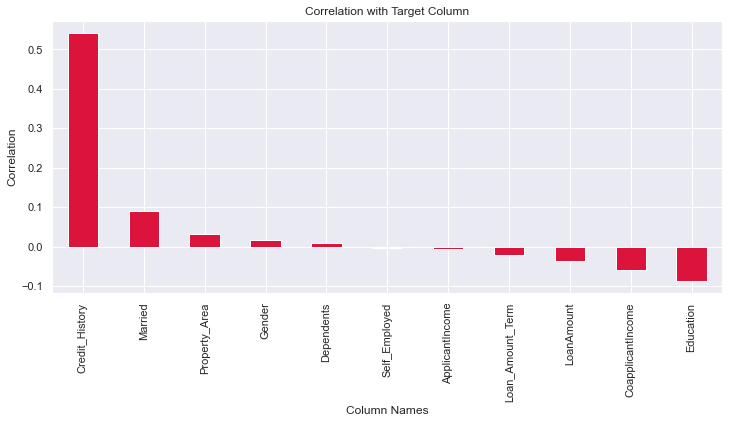

In [36]:
print(Correlation['Loan_Status'].drop('Loan_Status').sort_values(ascending = False))
plt.figure(figsize = [12,5])
Correlation['Loan_Status'].sort_values(ascending= False).drop('Loan_Status').plot(kind = 'bar', color ='crimson')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

### - KEY OBSERVATIONS-

- Loan status is highly positively correlated with 'Credit_History', while negatively correlated with 'Education'.
- Except the columns ['Credit_History', 'Married', 'Property_Area', 'Gender', 'Dependents'] all other columns are having positive correlation to the target variable 'Loan_Status'.
- The column 'Dependents' is having least positve correlation to the target variable 'Loan_Status' and the column 'Self_Employed' is having least negative correlation to the target variable 'Loan_Status'.

## DATA DISTRIBUTION 

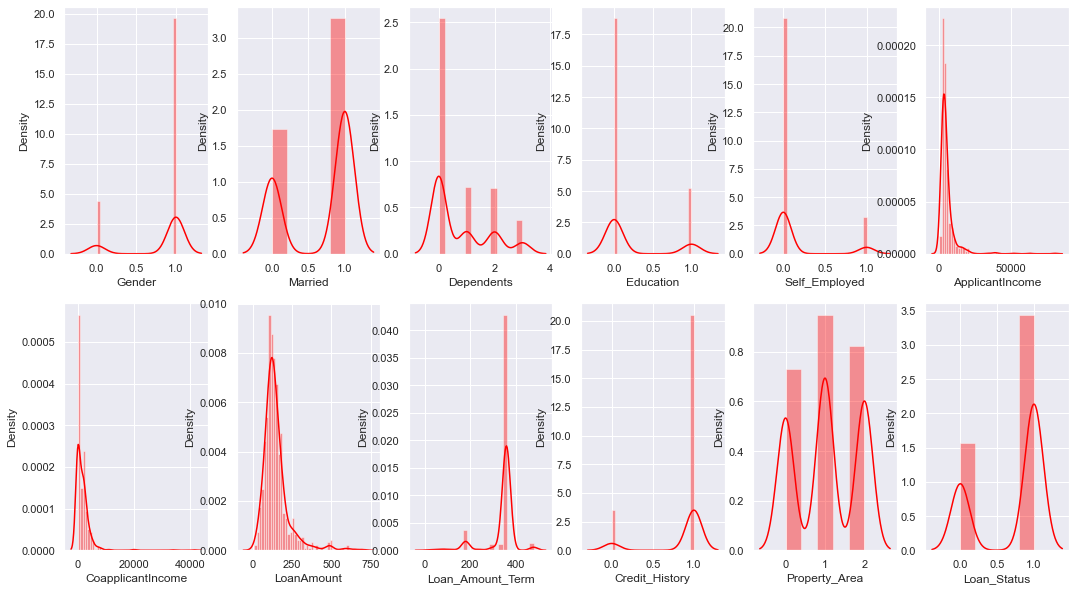

In [37]:
plt.figure(figsize=(18,10))
plot=1
for col in loan.columns:
    if plot<=12:
        plt.subplot(2,6,plot)
        sns.distplot(loan[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()

#### The data is not normally distributed for all the columns. Skewness is present in all the columns.

## CHECKING SKEWNESS -

In [38]:
skewness=loan.skew()
skewness

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### The columns 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Self_Employed','Education'and 'Dependents' are having high positive skewness. The columns ['Loan_Amount_Term', 'Credit_History', 'Gender'] are having high negative skewness. 

## DETECTING OUTLIERS

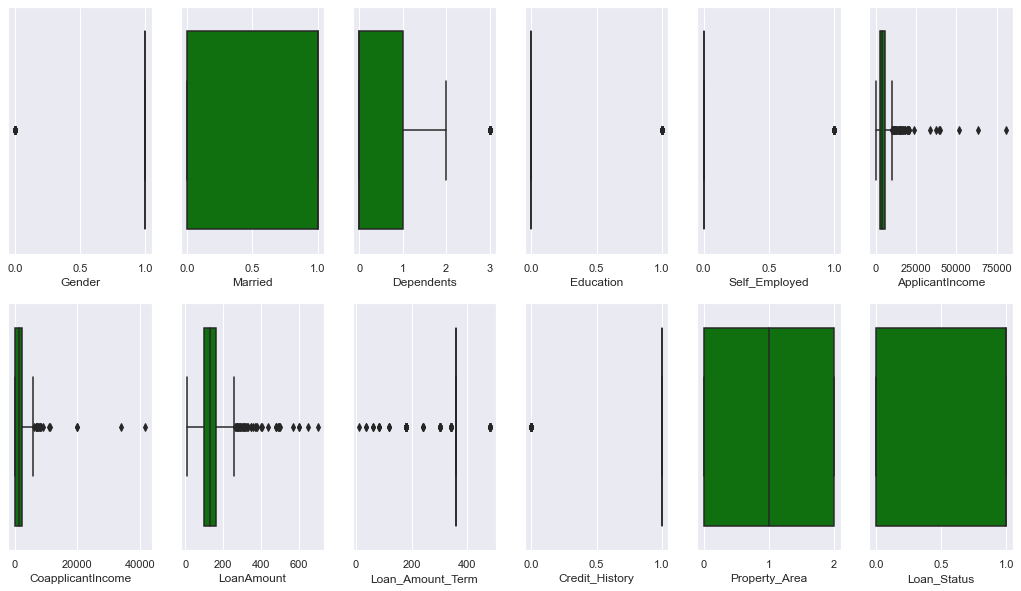

In [39]:
plt.figure(figsize=(18,10))
plot=1
for col in loan.columns:
    if plot<=12:
        plt.subplot(2,6,plot)
        sns.boxplot(loan[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

#### - All the numerical data contains outliers .Outliers are present in 'Appilcants Income', 'Coapplicants Income' and 'Loan Amounts'.

## DATA CLEANING
#### -Removing skewness and Outliers .

(614, 11)
(614,)
1    422
0    192
Name: Loan_Status, dtype: int64


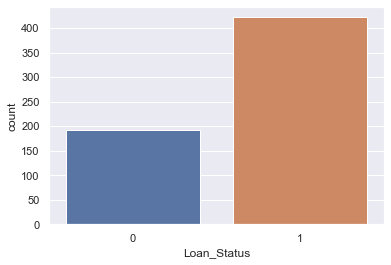

In [40]:
#Splitting the data into 'x' and 'y' labels-

x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

print(x.shape)
print(y.shape)

sns.countplot(y)
print(y.value_counts())

#### The data looks imbalanced.Let try to balance it.

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,Y=sm.fit_resample(x,y)
Y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

1    422
0    422
Name: Loan_Status, dtype: int64


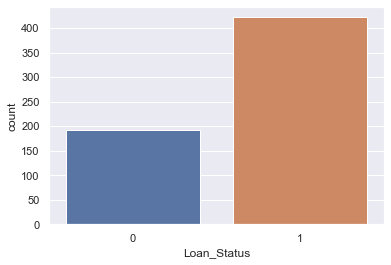

In [42]:
sns.countplot(y)
print(Y.value_counts())

#### - Now the data looks balanced . so we are good to proceed further.

In [43]:
print(X.shape)
print(Y.shape)

(844, 11)
(844,)


In [44]:
x = X.copy()
y = Y.copy()
print(x.shape)
print(y.shape)

(844, 11)
(844,)


In [45]:
#We can set the skewness standard limit as +/-0.5.

x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

CoapplicantIncome    6.400362
ApplicantIncome      6.324388
Self_Employed        2.615412
LoanAmount           2.600376
Education            1.626777
Dependents           1.185126
Credit_History      -0.919385
Gender              -1.302436
Loan_Amount_Term    -2.437053
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform

def skew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))
    
skew('CoapplicantIncome')
skew('ApplicantIncome')
skew('LoanAmount')
skew('Credit_History')
skew('Loan_Amount_Term')
skew('Self_Employed')
skew('Education')
skew('Dependents')
skew('Gender')


In [47]:
x.skew().sort_values(ascending = False)

Self_Employed        2.615412
Education            1.626777
Dependents           0.524499
Loan_Amount_Term     0.450550
Property_Area        0.101467
LoanAmount           0.011681
CoapplicantIncome   -0.076920
ApplicantIncome     -0.099346
Married             -0.268248
Credit_History      -0.919385
Gender              -1.302436
dtype: float64

In [48]:
x.shape

(844, 11)

#### The skewness has been removed.

## - Removing the Outliers
#### Using ZScore method

In [49]:
from scipy.stats import zscore

In [50]:
# Removing outliers using zscore and keeping threshold as 3 .
z_score = np.abs(zscore(x))

filter_entry = (z_score < 3).all(axis = 1)

loan_new = x[filter_entry]
loan_new['Loan_Status'] = y.copy()
loan_new.head()   

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.542659,0,-0.788544,-0.476177,-0.339009,0.555379,-1.061507,0.224181,0.175481,0.641382,2,1
1,0.542659,1,0.997122,-0.476177,-0.339009,0.180188,0.794318,-0.053899,0.175481,0.641382,0,0
2,0.542659,1,-0.788544,-0.476177,2.949771,-0.497735,-1.061507,-1.401791,0.175481,0.641382,2,1
3,0.542659,1,-0.788544,2.100061,-0.339009,-0.745347,0.921693,-0.186904,0.175481,0.641382,2,1
4,0.542659,0,-0.788544,-0.476177,-0.339009,0.593968,-1.061507,0.146096,0.175481,0.641382,2,1


In [51]:
loan_new.shape

(801, 12)

In [52]:
data_loss = (x.shape[0]-loan_new.shape[0])/x.shape[0]*100
data_loss

5.0947867298578196

#### We are losing only 5.09% of data after removing outliers using zscore method.so, we can further proceed with this method .

## - Checking the Multicolinearity of variables in the dataframe

In [53]:
x = loan_new.drop('Loan_Status',axis = 1)
y = loan_new['Loan_Status']
z = x.columns
print(x.shape)
print(y.shape)

(801, 11)
(801,)


## Applying Standard Scaler 

In [54]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.538382,-1.143834,-0.790052,-0.480015,-0.337709,0.650531,-1.064413,0.249174,0.351193,0.642416,1.379470
1,0.538382,0.874252,0.997885,-0.480015,-0.337709,0.207669,0.792645,-0.054517,0.351193,0.642416,-1.220425
2,0.538382,0.874252,-0.790052,-0.480015,2.961130,-0.592527,-1.064413,-1.526548,0.351193,0.642416,1.379470
3,0.538382,0.874252,-0.790052,2.083267,-0.337709,-0.884799,0.920105,-0.199772,0.351193,0.642416,1.379470
4,0.538382,-1.143834,-0.790052,-0.480015,-0.337709,0.696080,-1.064413,0.163897,0.351193,0.642416,1.379470
...,...,...,...,...,...,...,...,...,...,...,...
796,0.538382,0.874252,-0.790052,-0.480015,-0.337709,-0.283283,1.010537,0.333903,0.351193,-1.556624,-1.220425
797,0.538382,0.874252,1.409594,-0.480015,-0.337709,0.342998,-1.064413,0.016293,0.351193,-1.556624,-1.220425
798,0.538382,0.874252,0.997885,-0.480015,-0.337709,-2.649606,0.990673,-0.388811,0.351193,0.642416,1.379470
799,0.538382,0.874252,-0.790052,2.083267,-0.337709,-0.712741,1.015665,0.381024,-1.822083,-1.556624,0.079522


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [56]:
vif(x)

,Column Name,VIF Factor
0,Gender,1.309186
1,Married,1.461242
2,Dependents,1.167387
3,Education,1.071763
4,Self_Employed,1.054516
5,ApplicantIncome,2.091478
6,CoapplicantIncome,1.737011
7,LoanAmount,1.910553
8,Loan_Amount_Term,1.053834
9,Credit_History,1.044352


#### As we don't have much variance of inflation for the variables in the dataset which is a good sign that there is no multicolinearity between the variables in the dataset.

# MODEL BUILDING 

In [57]:
# SPLITTING THE DATA INTO X AND Y VARIABLE.

X = x.copy()
Y = y.copy()

In [58]:
# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# for cross validation
from sklearn.model_selection import cross_val_score

#Matrics for Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score

In [59]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()

#### FINDING BEST RANDOM STATE-

In [60]:
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.20, random_state = i)
   
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8881987577639752 on random_state: 19


In [61]:
#Applying the best selected random state -

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.20, random_state = 19)

In [62]:
# Training all the models together-

rfc.fit(x_train,y_train.ravel())
lr.fit(x_train,y_train.ravel())
knn.fit(x_train,y_train.ravel())
svc.fit(x_train,y_train.ravel())
dtc.fit(x_train,y_train.ravel())
abc.fit(x_train,y_train.ravel())
gbc.fit(x_train,y_train.ravel())
gnb.fit(x_train,y_train.ravel())
etc.fit(x_train,y_train.ravel())
xgbc.fit(x_train,y_train.ravel())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### TESTING ALL MODELS ONE BY ONE 

## 1) RANDOM FOREST CLASSIFIER

In [63]:
predrf = rfc.predict(x_test)
rfreport = pd.DataFrame(classification_report(y_test, predrf ,output_dict=True))

print("\n=======================TEST Result===========================")

print(f"Accuracy score:{accuracy_score(y_test,predrf)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rfreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predrf)}\n")



=======================TEST Result===========================
Accuracy score:88.82%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.859155   0.911111  0.888199    0.885133      0.888844
recall      0.884058   0.891304  0.888199    0.887681      0.888199
f1-score    0.871429   0.901099  0.888199    0.886264      0.888383
support    69.000000  92.000000  0.888199  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[61  8]
 [10 82]]



In [64]:
#CV score of Random forest classifier-

print(f"CV Score of RF:{cross_val_score(rfc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of RF:81.16%


## 2) LOGISTIC REGRESSION

In [65]:
predlr = lr.predict(x_test)
lrreport = pd.DataFrame(classification_report(y_test, predlr ,output_dict=True))

print("\n=======================TEST Result===========================")

print(f"Accuracy score:{accuracy_score(y_test,predlr)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lrreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predlr)}\n")



=======================TEST Result===========================
Accuracy score:87.58%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.901639   0.860000  0.875776    0.880820      0.877845
recall      0.797101   0.934783  0.875776    0.865942      0.875776
f1-score    0.846154   0.895833  0.875776    0.870994      0.874542
support    69.000000  92.000000  0.875776  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[55 14]
 [ 6 86]]



In [66]:
#CV score of Random forest classifier-

print(f"CV Score of LR:{cross_val_score(lr,X,Y,cv=5).mean()*100:.2f}%")

CV Score of LR:77.91%


## 3)Knn CLASSIFIER

In [67]:
predknn= knn.predict(x_train)

knnreport = pd.DataFrame(classification_report(y_train, predknn, output_dict = True))
print("\n=======================TRAIN Result===========================")
print(f"Accuracy score:{accuracy_score(y_train, predknn)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{knnreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train, predknn)}\n")


=======================TRAIN Result===========================
Accuracy score:80.16%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.855124    0.759104  0.801562    0.807114      0.808314
recall       0.737805    0.868590  0.801562    0.803197      0.801562
f1-score     0.792144    0.810164  0.801562    0.801154      0.800929
support    328.000000  312.000000  0.801562  640.000000    640.000000
________________________________________________________________
 Confusion Matrix:
[[242  86]
 [ 41 271]]



In [68]:
#CV score of Random forest classifier-

print(f"CV Score of kNN:{cross_val_score(knn,X,Y,cv=5).mean()*100:.2f}%")

CV Score of kNN:75.92%


## 4) SVC

In [69]:
predsvc = svc.predict(x_test)

svcreport = pd.DataFrame(classification_report(y_test, predsvc , output_dict=True))
print("\n=======================TEST Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predsvc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svcreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predsvc)}\n")


=======================TEST Result===========================
Accuracy score:88.20%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.931034   0.854369  0.881988    0.892702      0.887226
recall      0.782609   0.956522  0.881988    0.869565      0.881988
f1-score    0.850394   0.902564  0.881988    0.876479      0.880205
support    69.000000  92.000000  0.881988  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[54 15]
 [ 4 88]]



In [70]:
#CV score of Random forest classifier-

print(f"CV Score of SVC:{cross_val_score(svc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of SVC:79.29%


## 5) DECISION TREE CLASSIFIER

In [71]:
preddtc= dtc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, preddtc, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,preddtc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,preddtc)}\n")


=======================Train Result===========================
Accuracy score:82.61%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.797101   0.847826  0.826087    0.822464      0.826087
recall      0.797101   0.847826  0.826087    0.822464      0.826087
f1-score    0.797101   0.847826  0.826087    0.822464      0.826087
support    69.000000  92.000000  0.826087  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[55 14]
 [14 78]]



In [72]:
#CV score of Random forest classifier-

print(f"CV Score of DTC:{cross_val_score(dtc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of DTC:77.66%


## 6) GAUSSIAN NB CLASSIFIER

In [73]:
predgnb= gnb.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predgnb, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predgnb)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predgnb)}\n")


=======================Train Result===========================
Accuracy score:87.58%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.962264   0.833333  0.875776    0.897799      0.888589
recall      0.739130   0.978261  0.875776    0.858696      0.875776
f1-score    0.836066   0.900000  0.875776    0.868033      0.872600
support    69.000000  92.000000  0.875776  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[51 18]
 [ 2 90]]



In [74]:
#CV score of Random forest classifier-

print(f"CV Score of GNB:{cross_val_score(gnb,X,Y,cv=5).mean()*100:.2f}%")

CV Score of GNB:77.66%


## 7) ADA BOOST CLASSIFIER

In [75]:
predad= abc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predad, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predad)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predad)}\n")


=======================Train Result===========================
Accuracy score:85.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.835821   0.861702  0.850932    0.848762      0.850610
recall      0.811594   0.880435  0.850932    0.846014      0.850932
f1-score    0.823529   0.870968  0.850932    0.847249      0.850637
support    69.000000  92.000000  0.850932  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[56 13]
 [11 81]]



In [76]:
#CV score of Random forest classifier-

print(f"CV Score of ADA:{cross_val_score(abc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of ADA:78.91%


## 8) GRADIENT BOOSTING CLASSIFIER

In [77]:
predgbc= gbc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predgbc, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predgbc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predgbc)}\n")


=======================Train Result===========================
Accuracy score:85.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.816901   0.877778  0.850932    0.847340      0.851688
recall      0.840580   0.858696  0.850932    0.849638      0.850932
f1-score    0.828571   0.868132  0.850932    0.848352      0.851177
support    69.000000  92.000000  0.850932  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[58 11]
 [13 79]]



In [78]:
#CV score of Random forest classifier-

print(f"CV Score of GBC:{cross_val_score(gbc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of GBC:79.41%


## 9) EXTRA TREE CLASSIFIER

In [79]:
predetc= etc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predetc, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predetc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predetc)}\n")


=======================Train Result===========================
Accuracy score:83.85%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.811594   0.858696  0.838509    0.835145      0.838509
recall      0.811594   0.858696  0.838509    0.835145      0.838509
f1-score    0.811594   0.858696  0.838509    0.835145      0.838509
support    69.000000  92.000000  0.838509  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[56 13]
 [13 79]]



In [80]:
#CV score of Random forest classifier-

print(f"CV Score of ETC:{cross_val_score(etc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of ETC:79.41%


## 10) XGB CLASSIFIER

In [81]:
predxgb= xgbc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predxgb, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predxgb)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predxgb)}\n")


=======================Train Result===========================
Accuracy score:85.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.777778   0.925000  0.850932    0.851389      0.861905
recall      0.913043   0.804348  0.850932    0.858696      0.850932
f1-score    0.840000   0.860465  0.850932    0.850233      0.851694
support    69.000000  92.000000  0.850932  161.000000    161.000000
________________________________________________________________
 Confusion Matrix:
[[63  6]
 [18 74]]



In [82]:
#CV score of Random forest classifier-

print(f"CV Score of XGB:{cross_val_score(xgbc,X,Y,cv=5).mean()*100:.2f}%")

CV Score of XGB:81.53%


#### Considering every algorithm inmind , Random Forest is giving maximum accuracy but the difference between cross validation is very high but the XGB Classifier is providing the maximum accuracy score of 85.09% with a cross validation mean score of 81.53% . .Thereby,We can consider the XGBClassifier(xgbc) as the best model as it is providing the best accuracy score and maximum cross validation mean score.

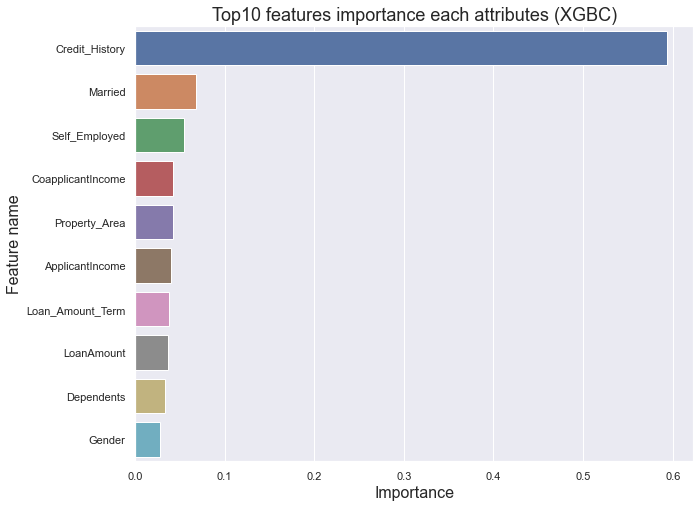

In [83]:
imp_id=pd.DataFrame({"Feature Name":x_train.columns,"Importance":xgbc.feature_importances_})
fi=imp_id.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title('Top10 features importance each attributes (XGBC)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature name', fontsize=16)
plt.show()

In [84]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


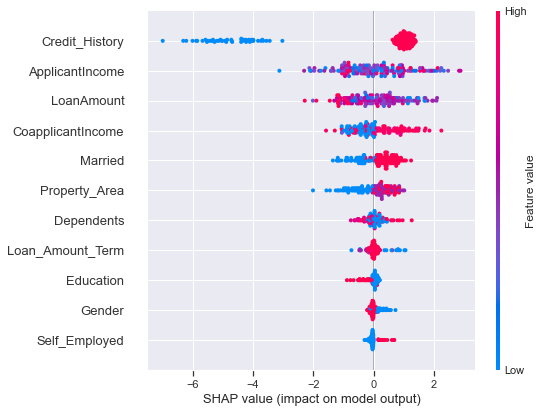

In [85]:
import shap

exp=shap.TreeExplainer(xgbc)
shap_value=exp.shap_values(x_test)
shap.summary_plot(shap_value,x_test)

Text(0.5, 1.0, 'Accuracy for XGBC :0.845679012345679')

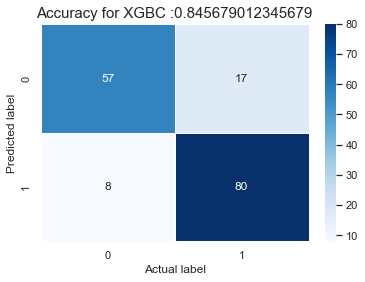

In [104]:
cm=confusion_matrix(y_test,predxgb)
sns.heatmap(data=cm,linewidths=.5,annot=True,cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
all_sample_title='Accuracy for XGBC :{0}'.format(xgbc.score(x_test,y_test))
plt.title(all_sample_title,size=15)

## HYPERPARAMETER TUNNING OF XGBC

In [86]:
parameters = {'booster':['gbtree','dart'],
             'eta': [0.3,0.4,0.5],
             'max_depth': [4,5,6],
             'sampling_method':['uniform','subsample']}

grid = GridSearchCV(estimator = XGBClassifier(),param_grid=parameters, cv = 5)

In [87]:
grid.fit(X,Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [88]:
grid.best_score_

0.8153416149068324

In [89]:
grid.best_params_

{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 5, 'sampling_method': 'uniform'}

In [90]:
xgbc = XGBClassifier(booster = 'gbtree',eta = 0.3,max_depth = 5,sampling_method = 'uniform')
x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = 19)

xgbc.fit(x_train, y_train)
pred_test = xgbc.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))
cv_score = cross_val_score(xgbc,X,Y, cv = 5)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.8571428571428571
[[63  6]
 [17 75]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        69
           1       0.93      0.82      0.87        92

    accuracy                           0.86       161
   macro avg       0.86      0.86      0.86       161
weighted avg       0.87      0.86      0.86       161

CV score is  0.8153416149068324


#### After all the tests, cross validations and tunings, the XGB classifier(xgbc) is performing well and the accuracy score improved with  85.71% with a cross validation mean score of 81.53% for 5 cross validations.

## The XGBoost Classifier(xgbc) is providing the maximum accuracy score of 85.71%.

## Plotting AUC ROC curve

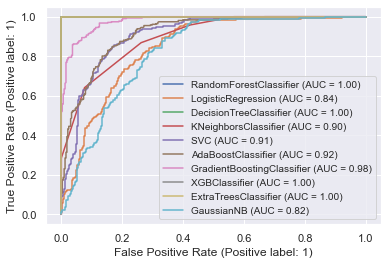

In [91]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rfc,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)

plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(abc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(gbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(xgbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(etc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(gnb,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

In [92]:
def auc_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

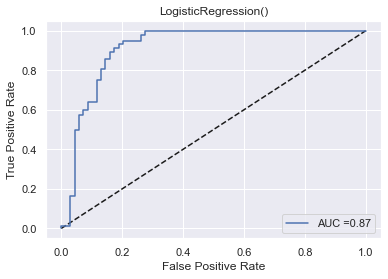

In [93]:
auc_roc(lr)

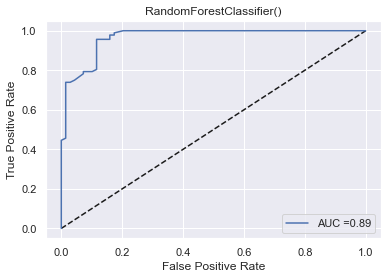

In [94]:
auc_roc(rfc)

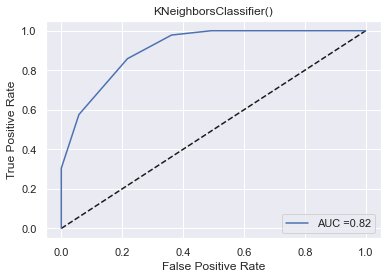

In [95]:
auc_roc(knn)

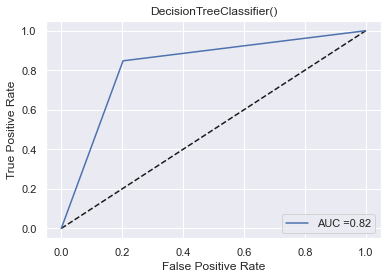

In [96]:
auc_roc(dtc)

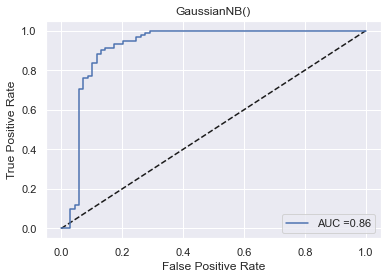

In [97]:
auc_roc(gnb)

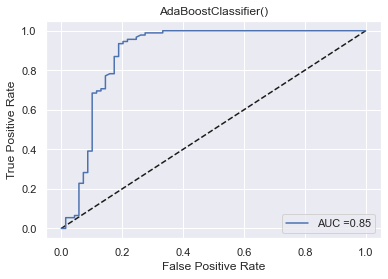

In [98]:
auc_roc(abc)

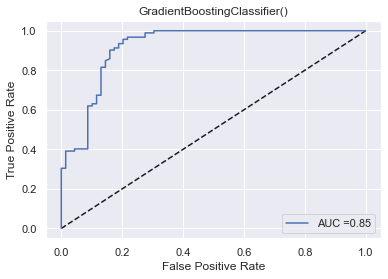

In [99]:
auc_roc(gbc)

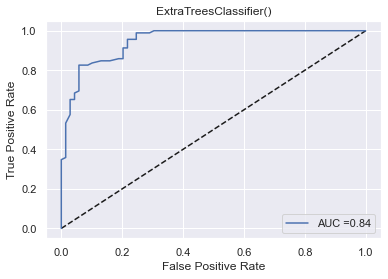

In [100]:
auc_roc(etc)

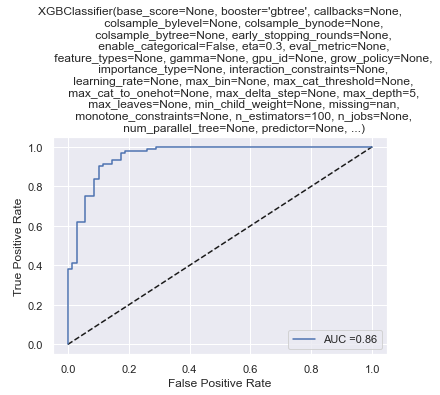

In [101]:
auc_roc(xgbc)

### Saving the Best Model

In [102]:
import pickle

filename = 'Loan application approval prediction model.pkl'
pickle.dump(xgbc,open(filename,'wb'))

### Conclusion

In [103]:
original = np.array(y_test)
predicted = np.round(np.array(xgbc.predict(x_test)),0)

loan_prediction = pd.DataFrame({'Original Loan_Status':original,'Predicted Loan Status':predicted})
loan_prediction.sample(10)

,Original Loan_Status,Predicted Loan Status
143,1,0
127,1,1
51,1,1
93,1,1
114,0,0
4,0,0
113,1,1
87,0,0
120,1,1
10,1,1


**********------done------------************